USGS 11119750 MISSION C NR MISSION ST NR SANTA BARBARA CA Latitude 34°25'39",   Longitude 119°43'31"   NAD83Santa Barbara County, California, Hydrologic Unit 18060013 Drainage area: 8.38 square miles Datum of gage: 140 feet above   NGVD29.

Part 1 - Flow Duration Curve

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xlrd

df = pd.read_excel('daily_flows.xlsx')
df = df.set_index('Decimal Year').drop(df.columns[0], axis = 1)

In [2]:
df_nonan = df.dropna()

In [10]:
df_nonan = df_nonan.replace({'Flow':0},.001)

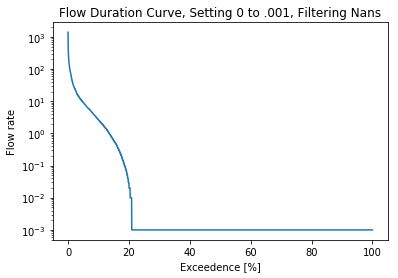

In [19]:
sort = np.sort(np.array(df_nonan.Flow))[::-1]
exceedance = np.arange(1.,len(sort)+1) / len(sort)
plt.plot(exceedance*100, sort)
plt.xlabel("Exceedence [%]")
plt.ylabel("Flow rate")
plt.yscale("log")
plt.title("Flow Duration Curve, Setting 0 to .001, Filtering Nans")
plt.show()

In [23]:
df_nonan = df.dropna()

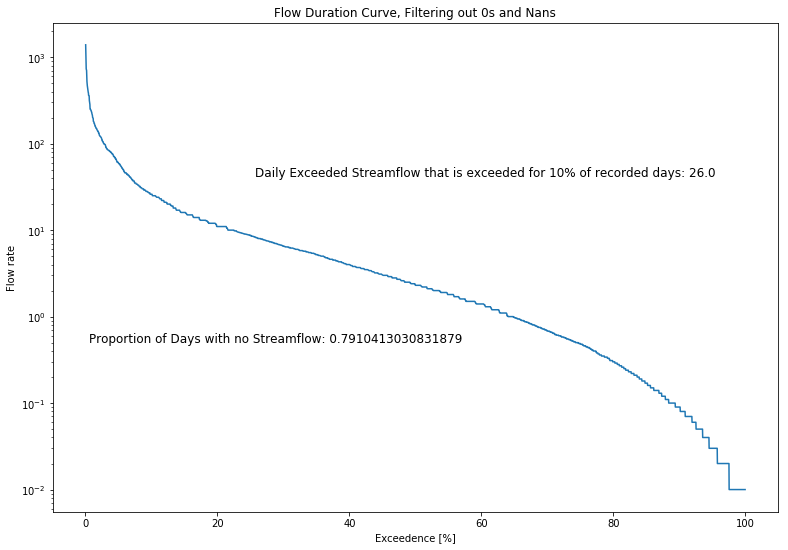

In [79]:
df_nonan_nozero = df_nonan[(df_nonan != 0).all(1)]

sort = np.sort(np.array(df_nonan_nozero.Flow))[::-1]
exceedance = np.arange(1.,len(sort)+1) / len(sort)
plt.figure(figsize=(13,9))
plt.plot(exceedance*100, sort)
plt.xlabel("Exceedence [%]")
plt.ylabel("Flow rate")
plt.yscale("log")
plt.title("Flow Duration Curve, Filtering out 0s and Nans")
prop_zeros = "Proportion of Days with no Streamflow: " + \
    str(df[df.Flow == 0].count()[0]/df_nonan.count()[0])
    
exceedance_df = pd.DataFrame({'sorted_flow':sort,\
                        'exceedance':exceedance})
daily_exceeded_10_perc = exceedance_df[(exceedance_df.exceedance < 0.10025)&\
    (exceedance_df.exceedance > 0.09995)]['sorted_flow'].values[0]

daily_exc_text = "Daily Exceeded Streamflow that is exceeded for 10% of recorded days: " + \
    str(daily_exceeded_10_perc)
    
plt.text(.5, .5, prop_zeros, fontsize=12)
plt.text(25.75, 41.75, daily_exc_text, fontsize=12)
plt.show()

Part 2